# Exploratory Data Analysis (EDA)

This is the basic initial analysis of the dataset to get some relevant information about the dataset before modelling.

In [17]:
#importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pylab import rcParams

In [2]:
# loading the dataset
df = pd.read_csv('cervical_cancer.csv')
df = df.drop(['Unnamed: 0'], axis =1)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


##Basic Exploration

In [3]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.0,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.0,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,27.220568,2.529093,17.115020,2.173207,0.143437,1.204146,0.462355,0.627876,2.186149,0.112314,0.516198,0.105548,0.178620,0.059540,0.0,0.005413,0.058187,0.024357,0.001353,0.001353,0.001353,0.0,0.023004,0.001353,0.002706,0.024357,0.010825,0.024357,0.031123,0.046008,0.097429,0.055480,0.070365
std,8.720832,1.684508,2.850195,1.529223,0.350755,4.079746,2.305306,0.483699,3.637060,0.315966,1.945535,0.307466,0.565999,0.236793,0.0,0.073422,0.234255,0.154260,0.036786,0.036786,0.036786,0.0,0.150018,0.036786,0.051987,0.154260,0.103551,0.154260,0.173768,0.209645,0.296742,0.229071,0.255935
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
column = df.columns.to_list()

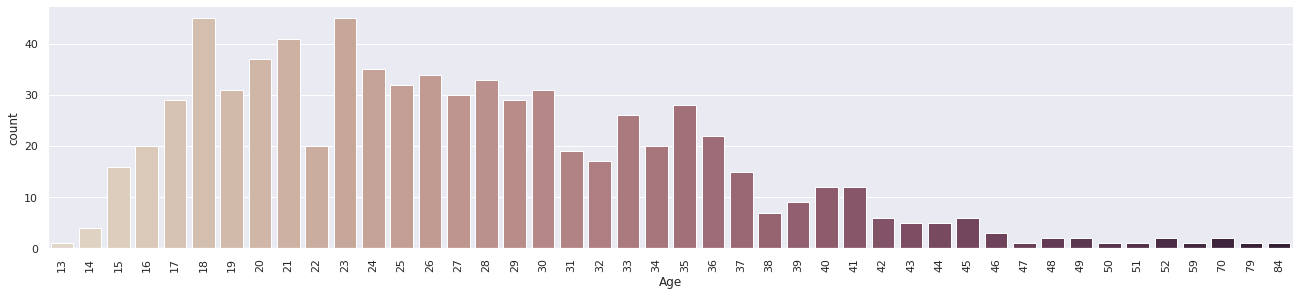

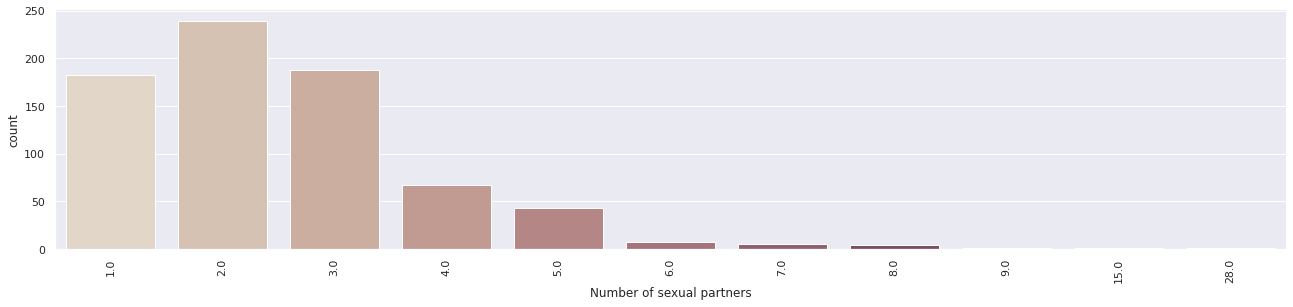

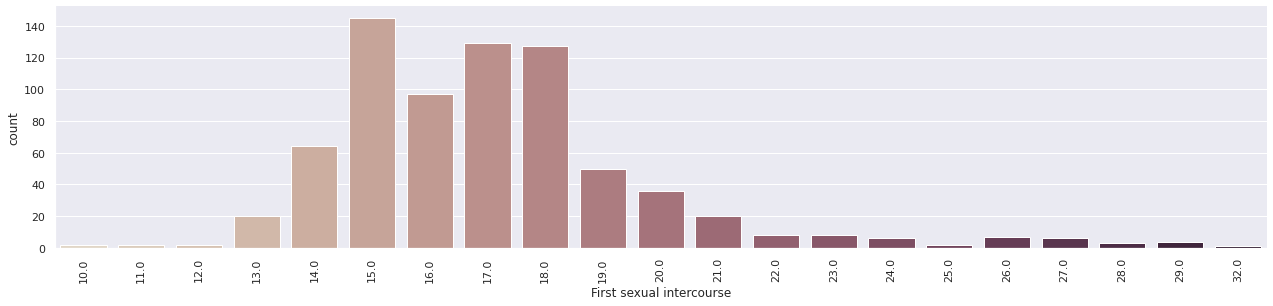

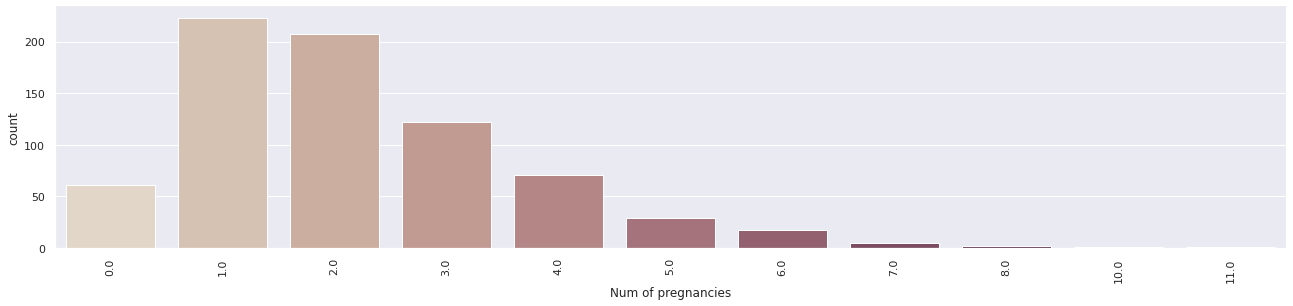

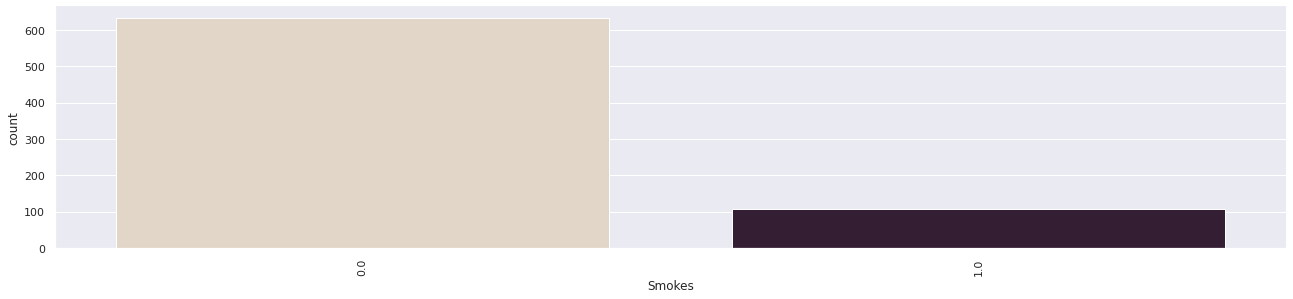

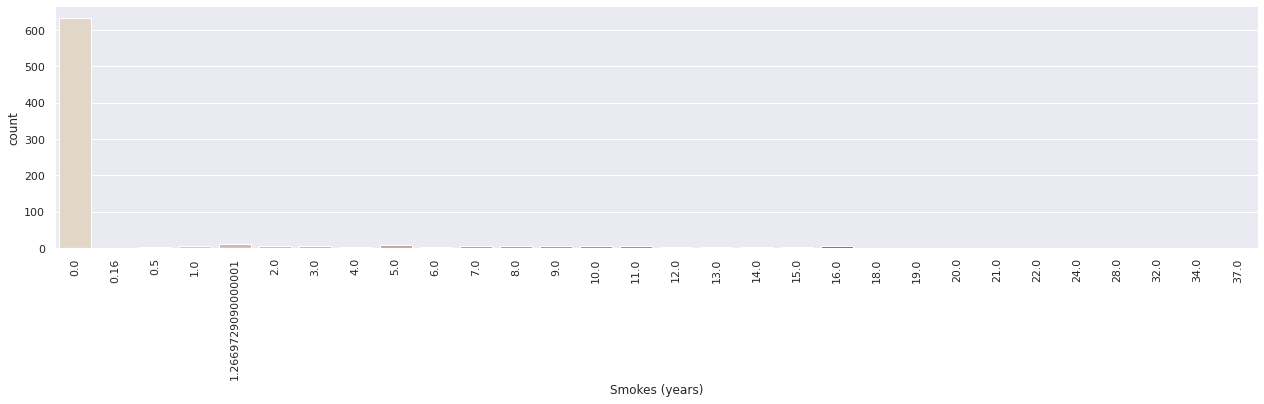

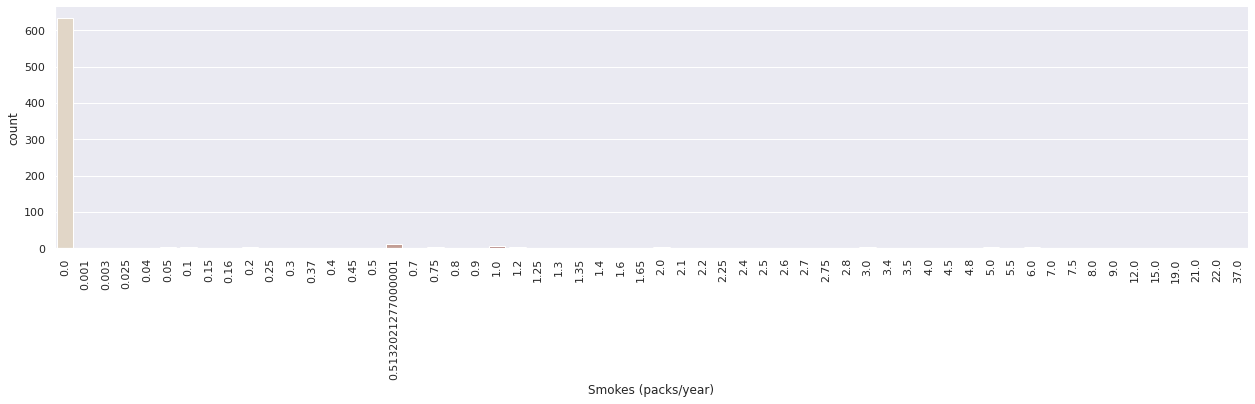

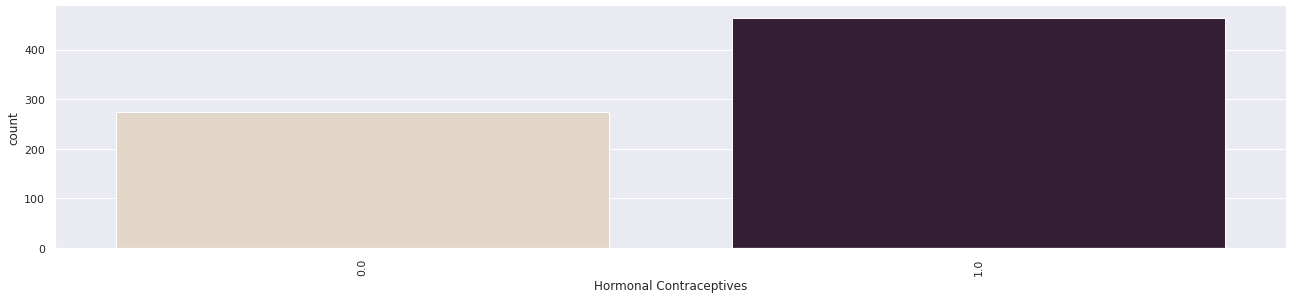

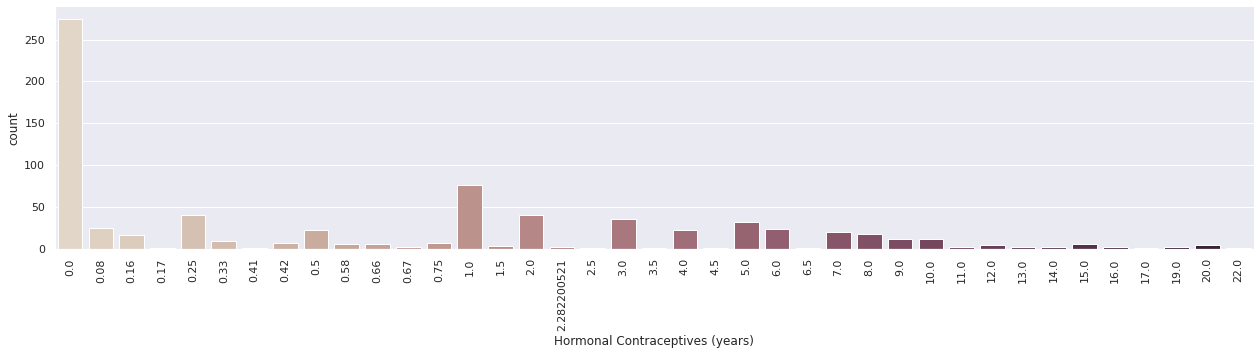

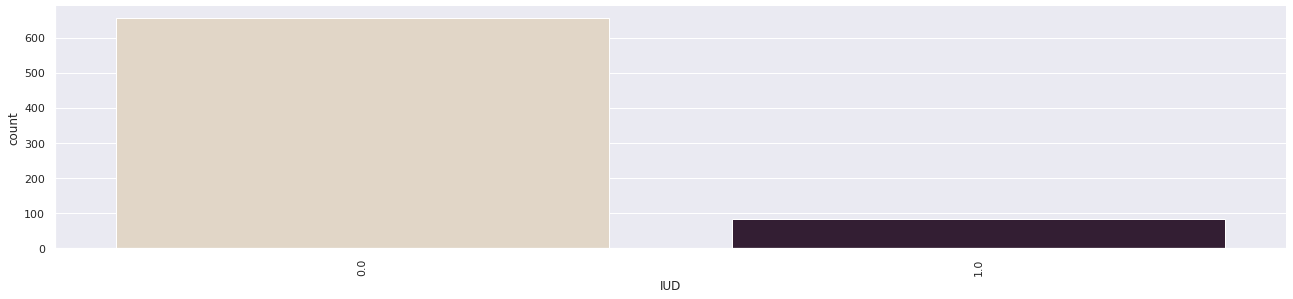

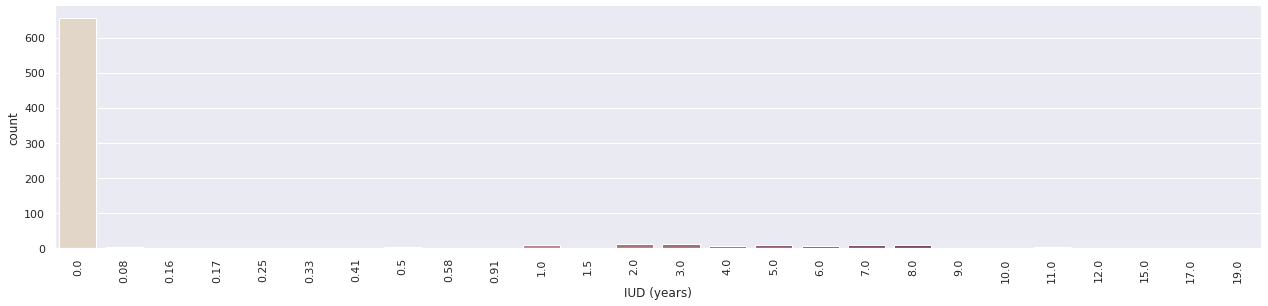

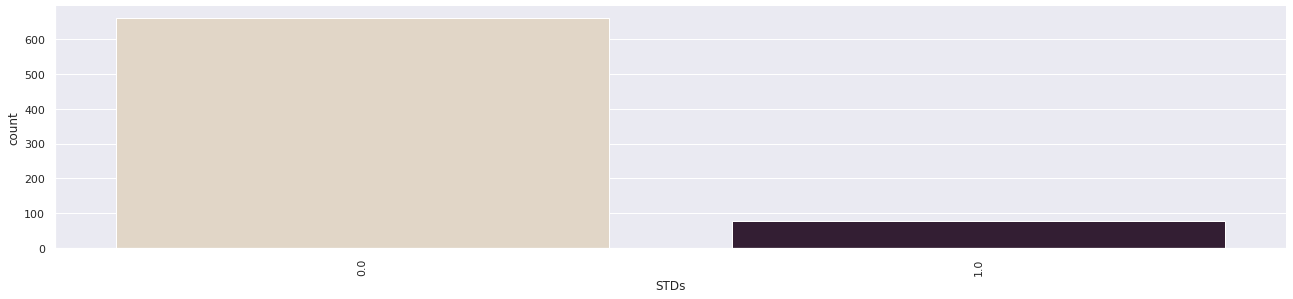

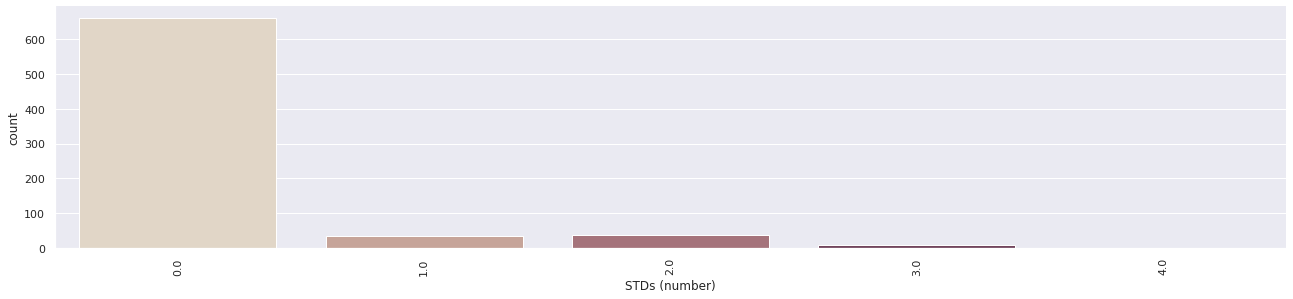

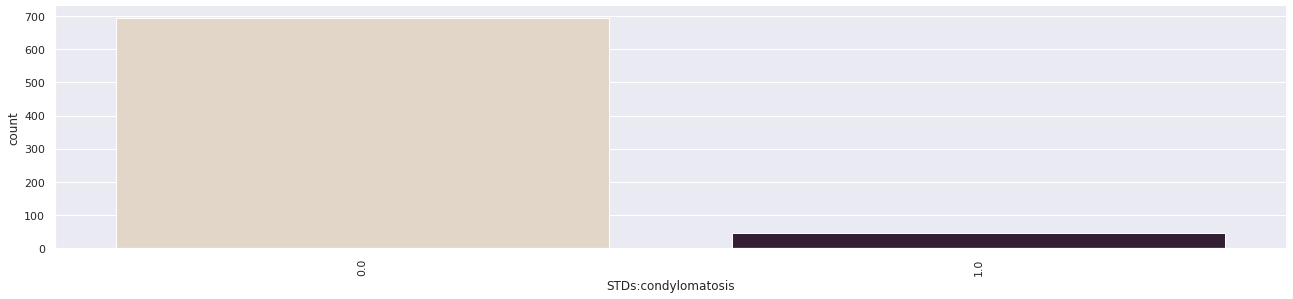

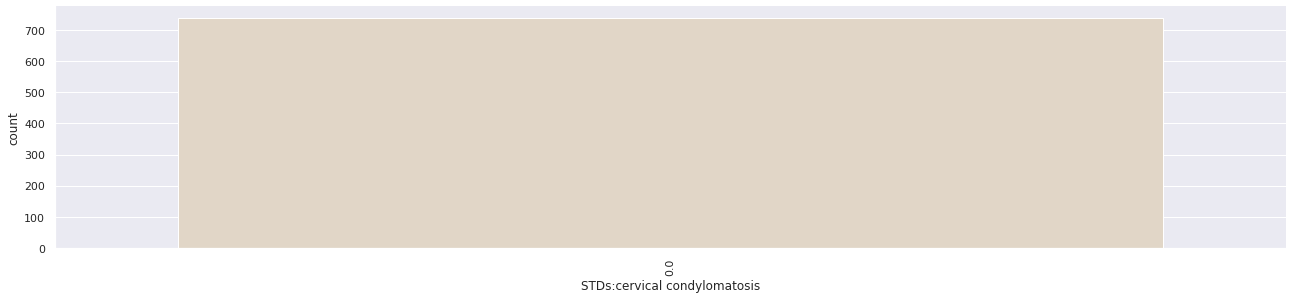

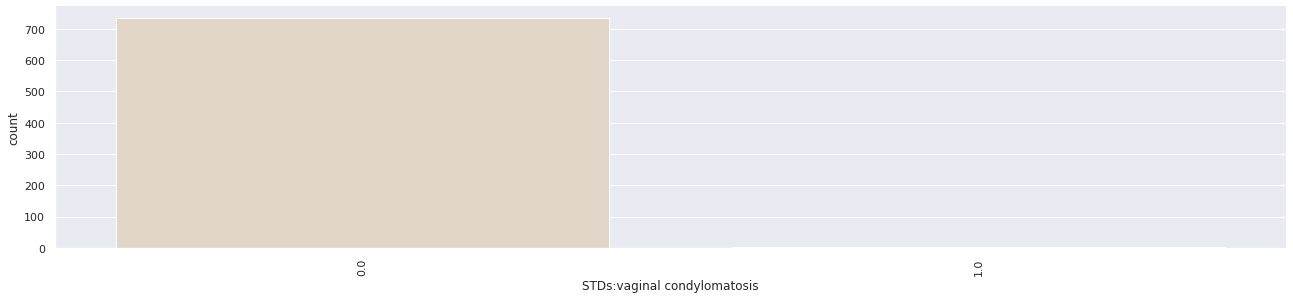

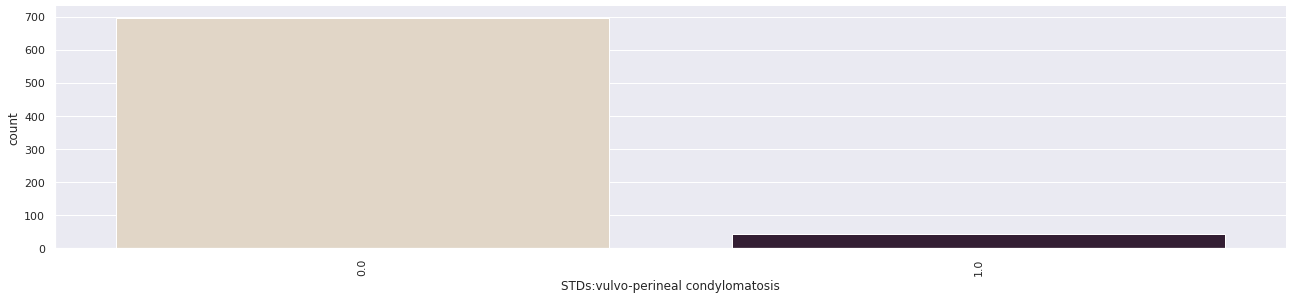

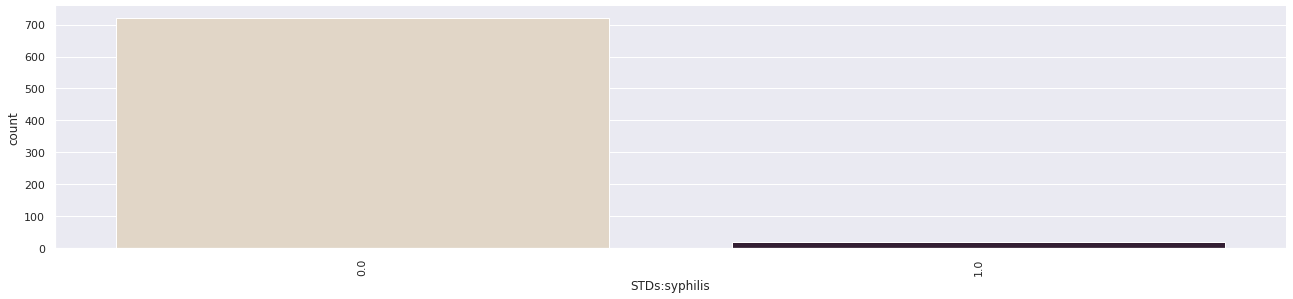

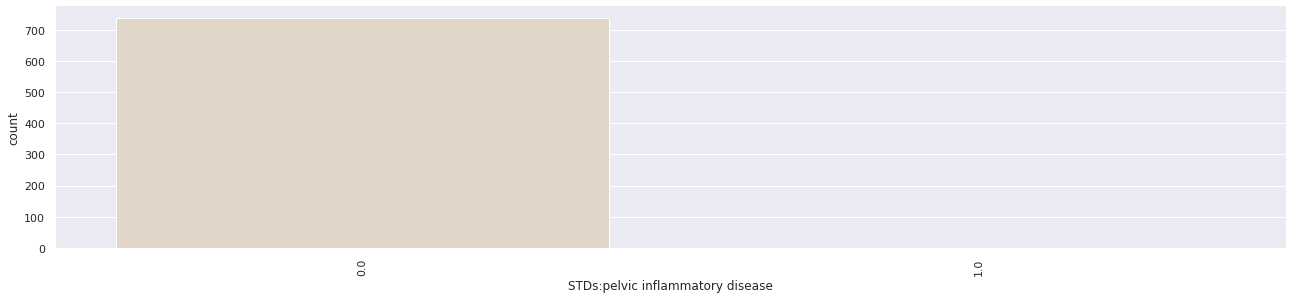

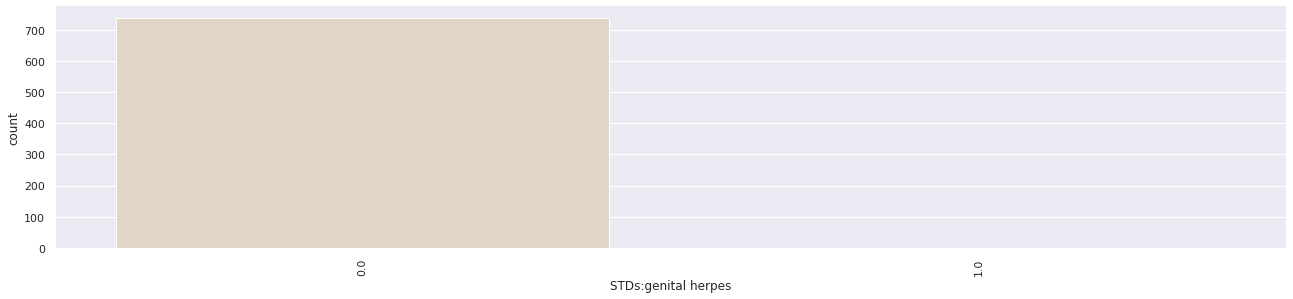

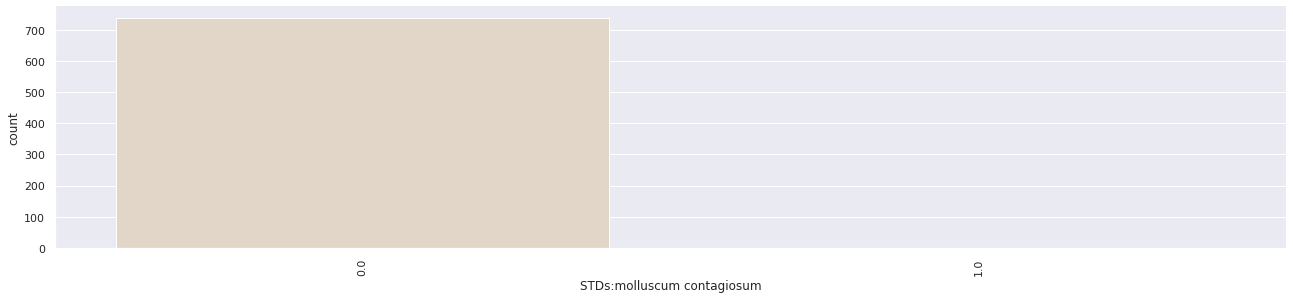

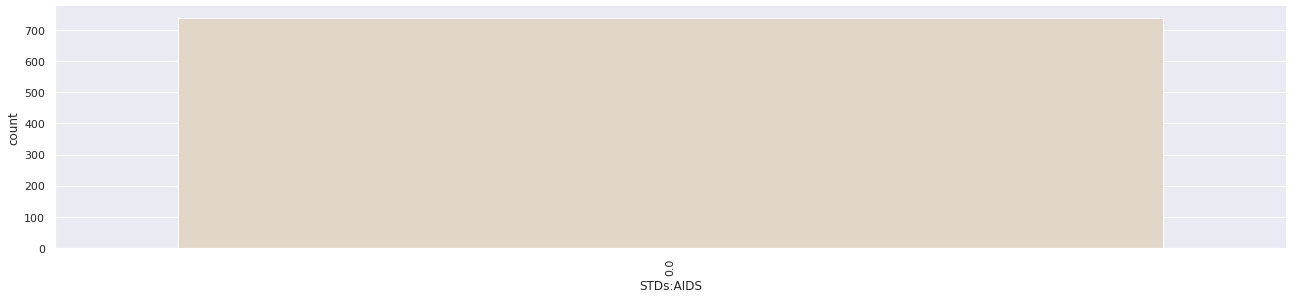

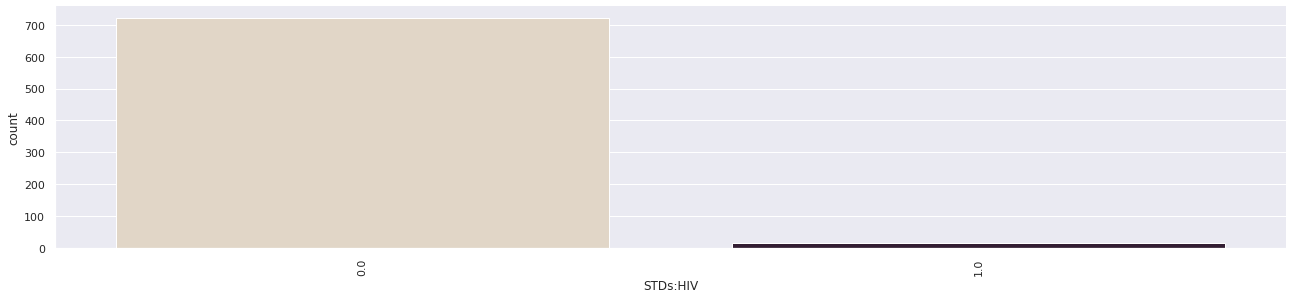

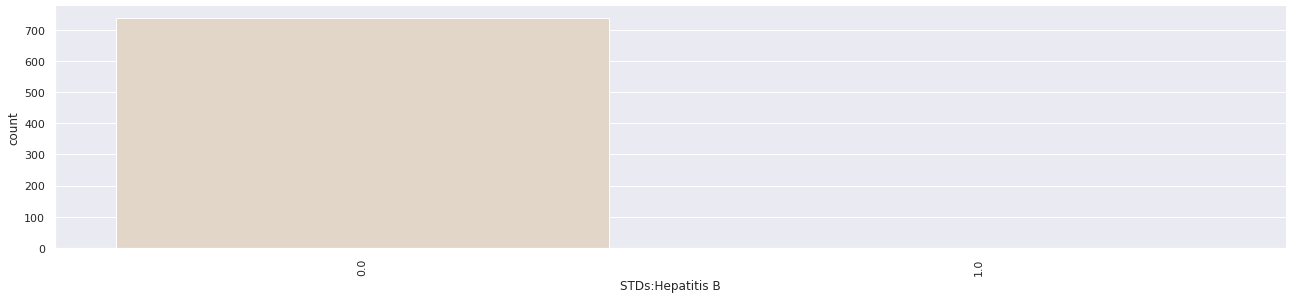

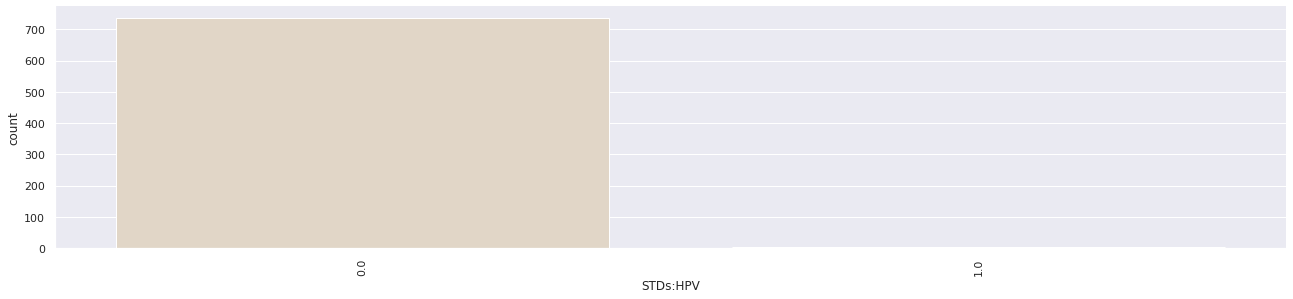

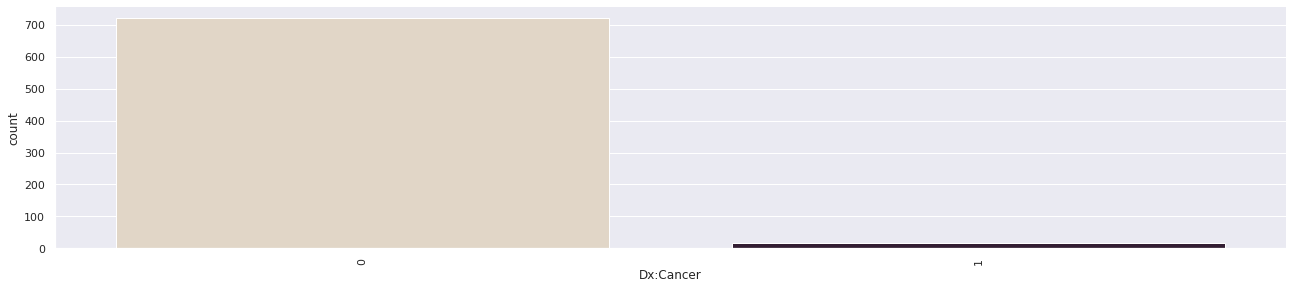

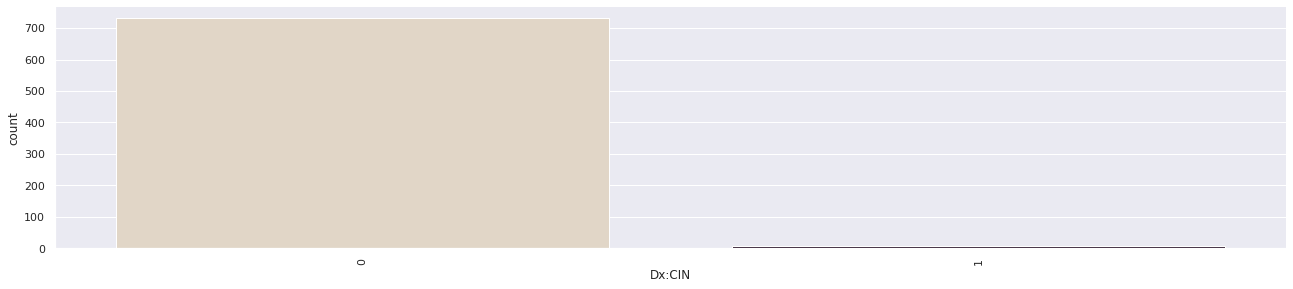

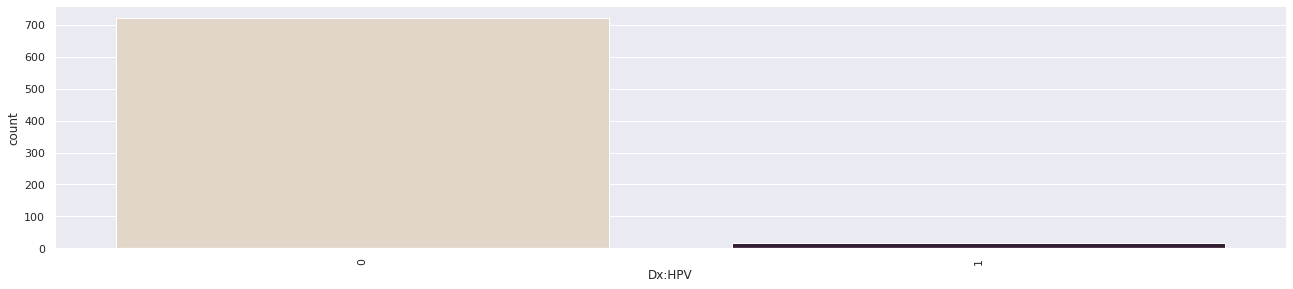

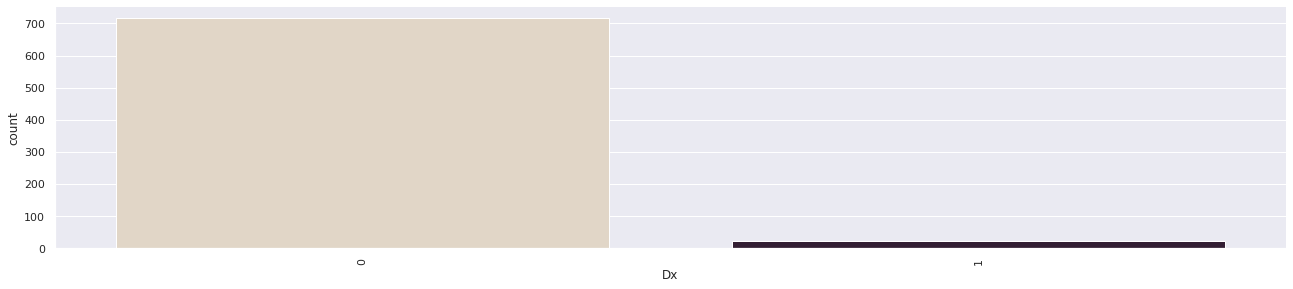

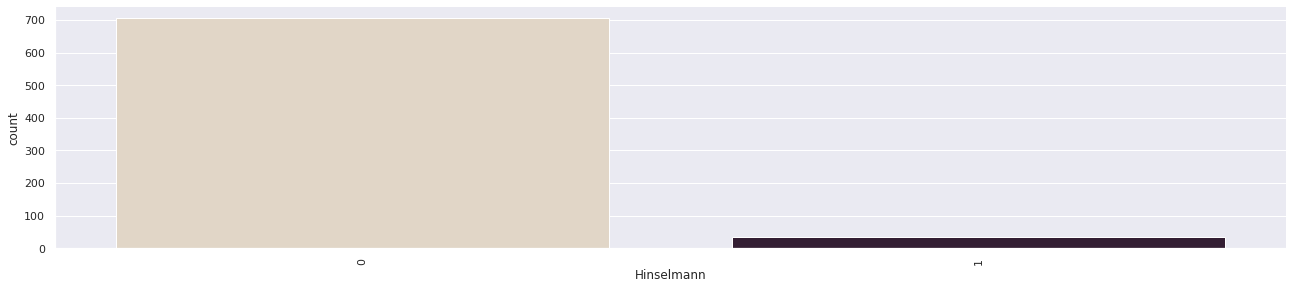

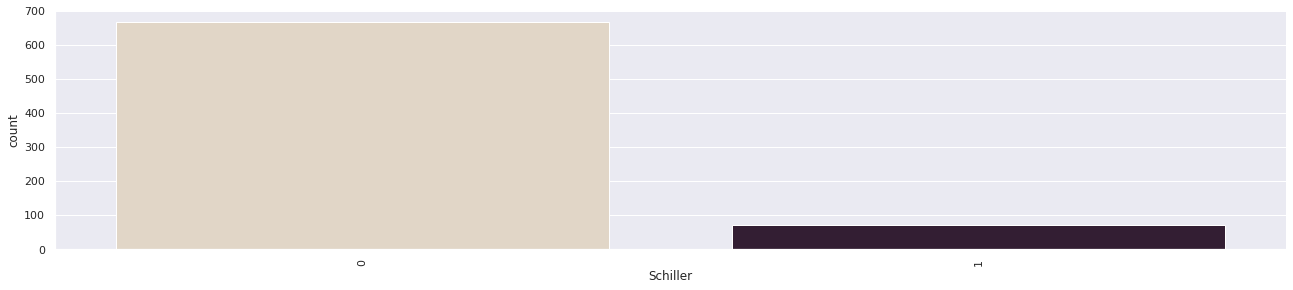

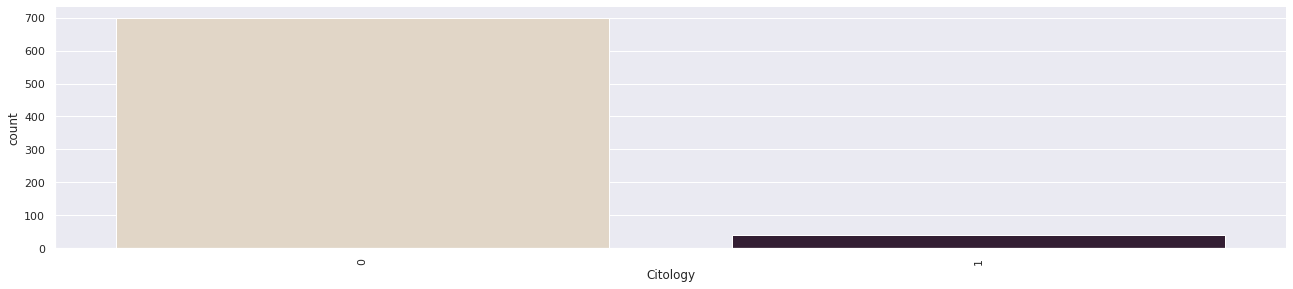

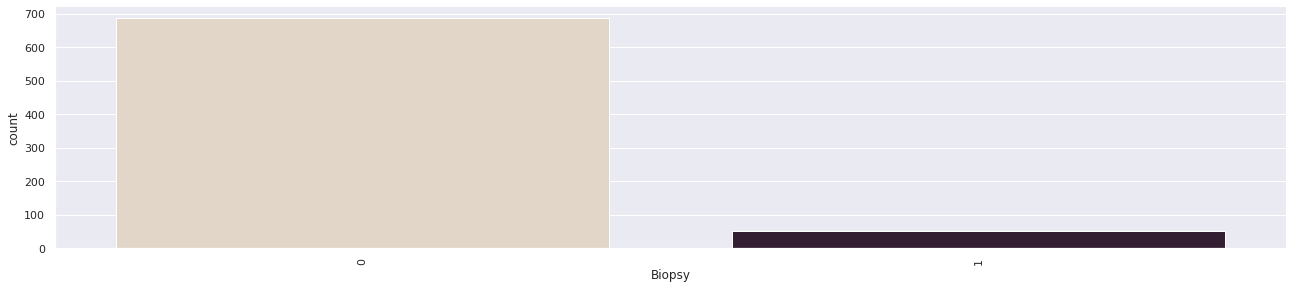

In [5]:
for col in column:
  chart = sns.catplot(x = col, kind = "count", palette = "ch: 0.25", data = df)
  chart.set_xticklabels(rotation=90)
  chart.fig.set_figwidth(20)
  chart.fig.set_figheight(4)
  plt.show()

## Heatmap

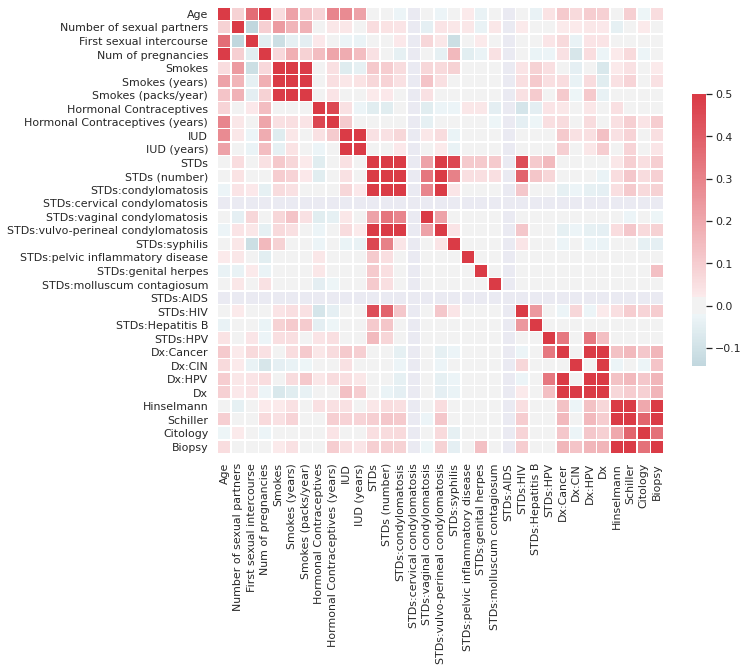

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.corr(), vmax=0.5, center=0, cmap=cmap,  square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

From above corrleation plot we can see that CIN and HPV are crucial for cancer detection. As these causes the cervical cancer. Additionally, age, number of pregnancies, smoking history, using contrceptives are equally pertinent for detection of cervical cancer. 

## Sexual history 

This includes - number of pregnanices, number of sexual partners, age, first sexual intercourse.

In [33]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx']
output_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

###First sexual intercourse

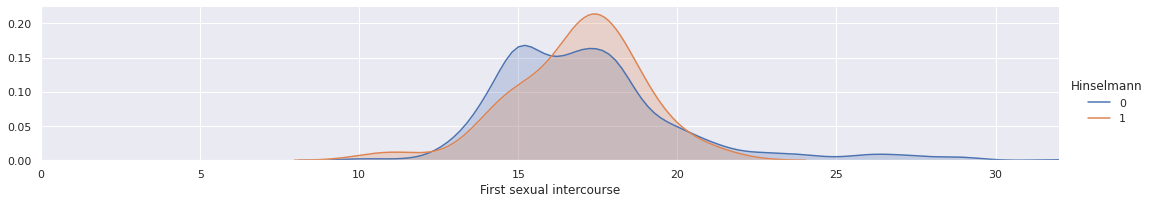

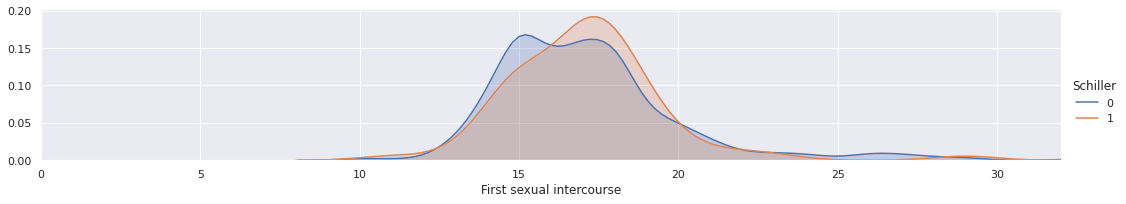

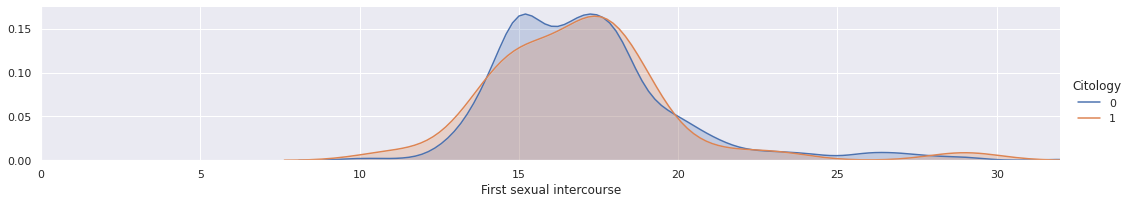

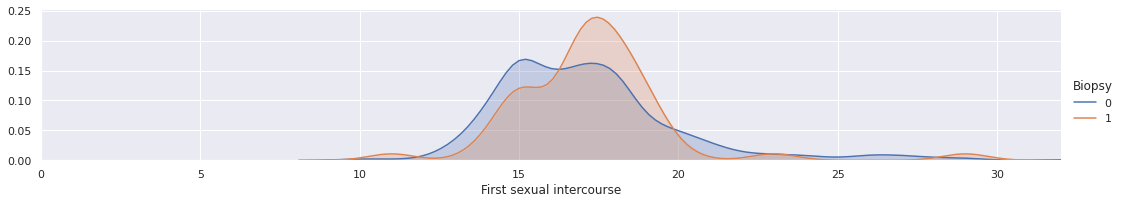

In [49]:
for feature in output_df:
  as_fig = sns.FacetGrid(df,hue=feature,aspect=5)
  as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)
  oldest = df['First sexual intercourse'].max()
  as_fig.set(xlim=(0,oldest))
  as_fig.add_legend()

If woman have their first sexual intercourse between the age of 15-20 are more susceptible to cervical cancer.

###Number of Sexual Partners

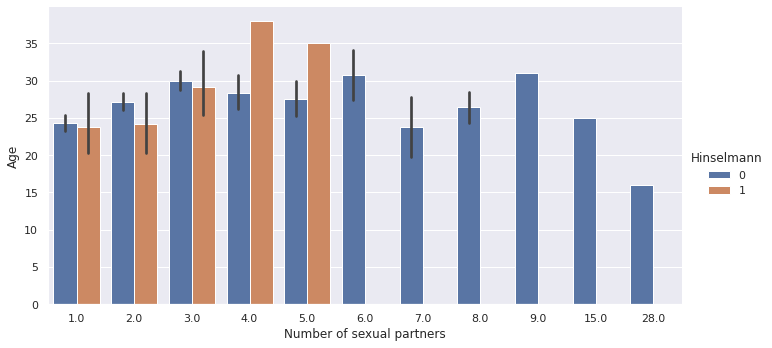

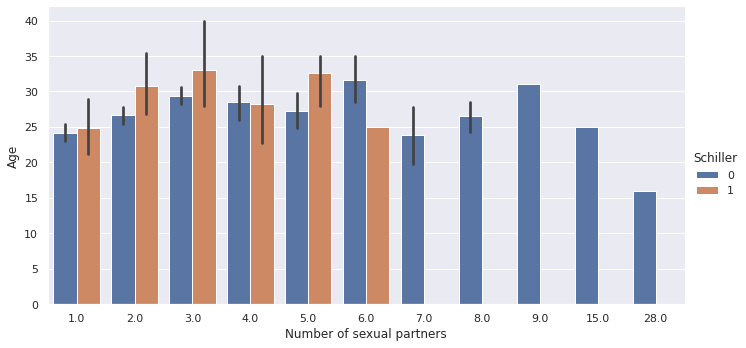

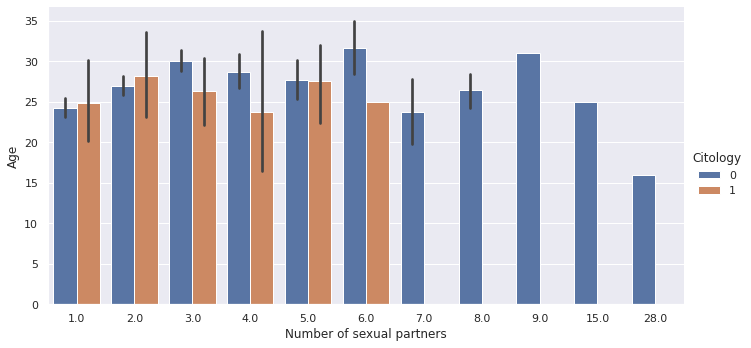

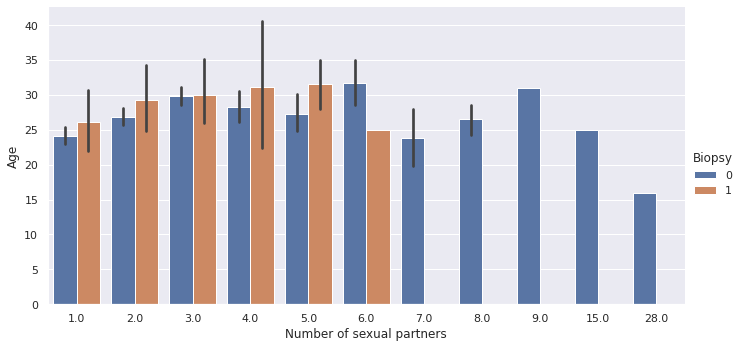

In [47]:
for feature in output_df:
  sns.catplot(x='Number of sexual partners',y='Age',hue=feature,data=df,aspect=1.95,kind='bar')

People with few sexual partners too have cancer.

###Number of pregnancies

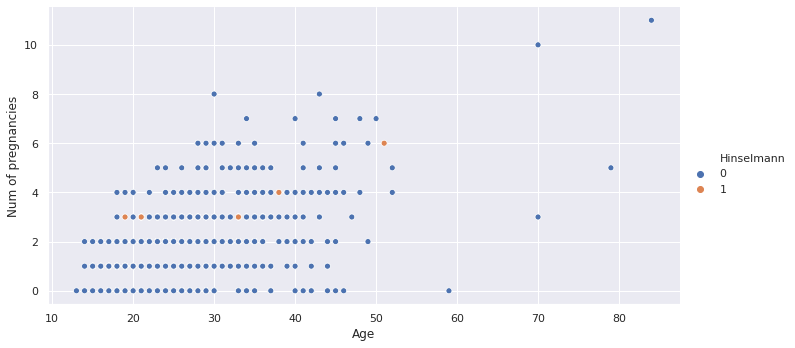

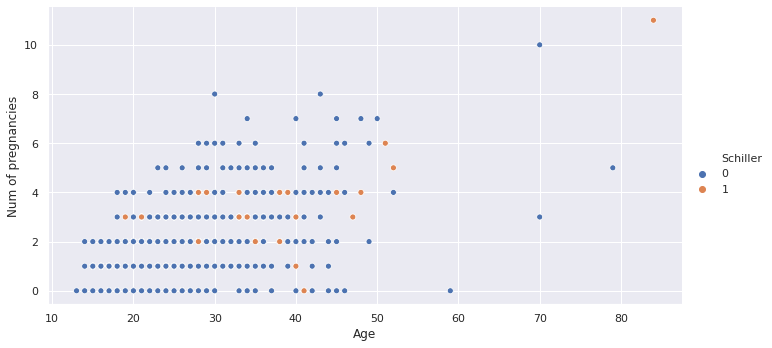

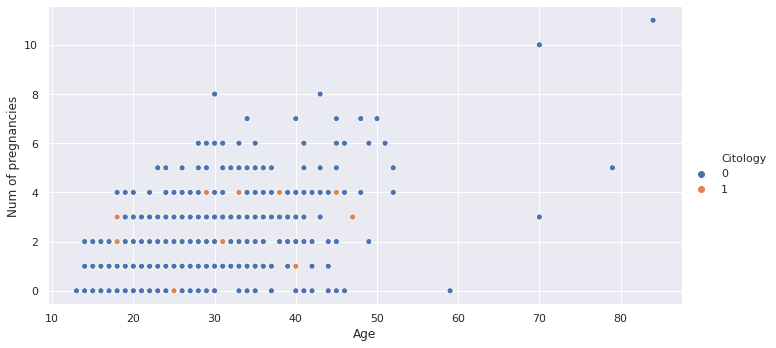

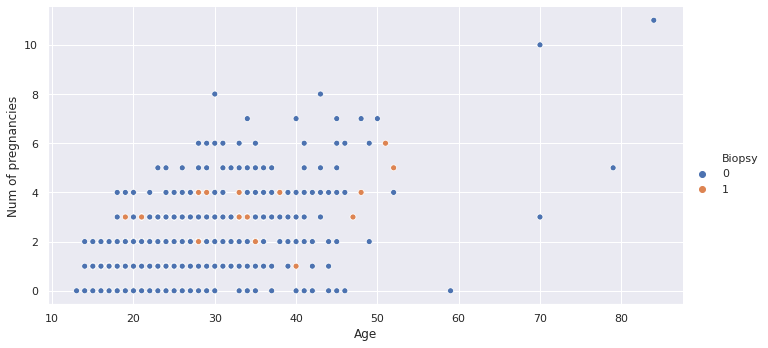

In [48]:
for feature in output_df:
  sns.relplot(y='Num of pregnancies',x='Age',hue=feature,data=df,aspect=1.95)

We can infer that woman between the age 18-45 are more prone to cervical cancer. Moreover, it can be seen that woman with more than 4 pregnancies are proen to cancer.

## Contraceptive utilisation correlation

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


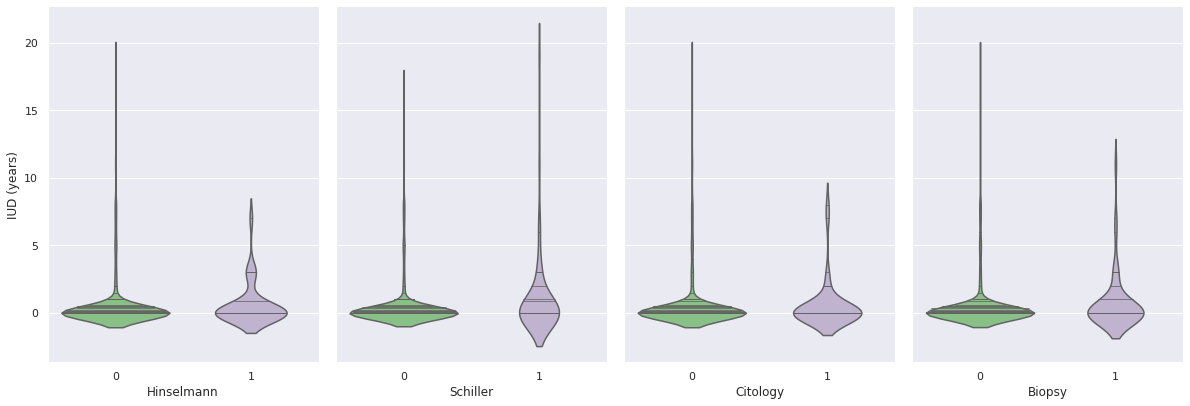

In [20]:
g = sns.PairGrid(df, y_vars=['IUD (years)'], x_vars= output_df, aspect=.75, size=5.5)
g.map(sns.violinplot, palette="Accent",inner='stick');

It can be deciphered from the above graph that who used IUD irrespective of number of years has less chance to be prone to cervical cancer. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


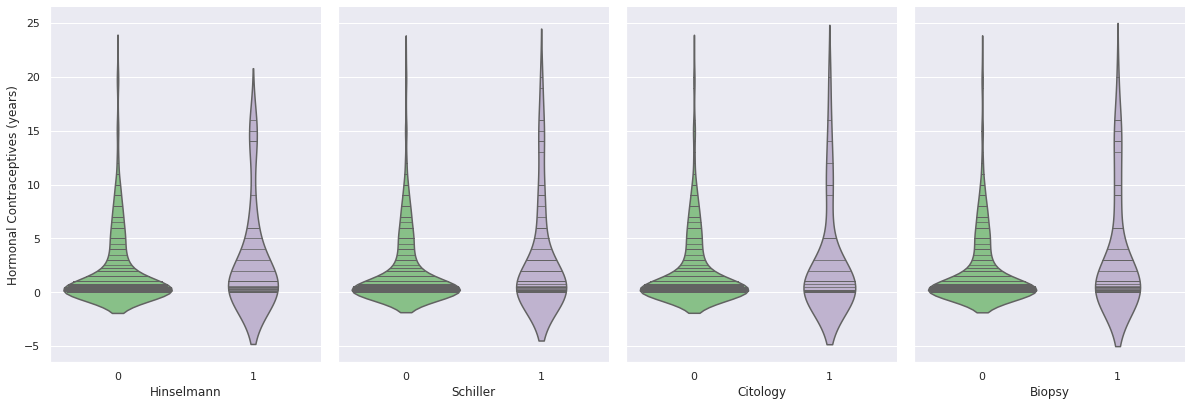

In [11]:
g = sns.PairGrid(df, y_vars=['Hormonal Contraceptives (years)'], x_vars= output_df, aspect=.75, size=5.5)
g.map(sns.violinplot, palette="Accent",inner='stick')

People who use Hormonal contrceptives are less prone to cervical cancer but more if considered to IUD.

##Smoking History

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


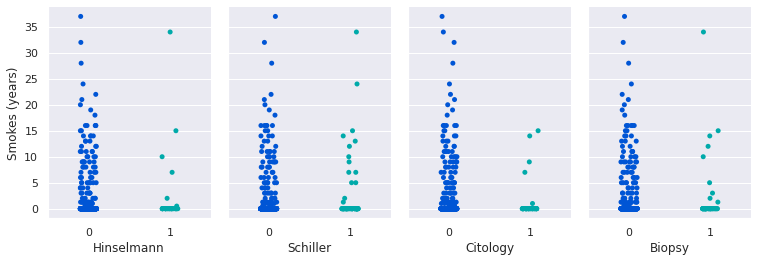

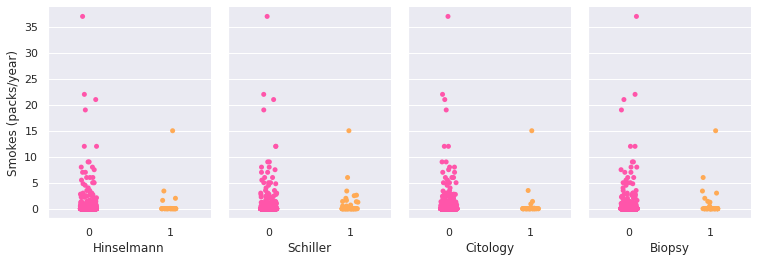

In [42]:
g = sns.PairGrid(df,
                 y_vars=['Smokes (years)'],
                 x_vars= output_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars= output_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="spring")

Woman who have been smoking for more than 1-2 yrs are more prone to cervical cancer